In [1]:
import sys

import numpy as np

from stixdcpy.quicklook import LightCurves
from stixdcpy.energylut import EnergyLUT
from stixdcpy.housekeeping import Housekeeping
from stixdcpy import ancillary as anc

from stixdcpy.science import L1Product as L1
from stixdcpy.science import SpectrogramProduct as Spectrogram
#Spectrogram

from matplotlib import pyplot as plt

from pprint import pprint
%matplotlib notebook

In [2]:
request_id=	2108030003
l1sig=L1.fetch(request_id=request_id)

request_id=2107040009
l1bkg=L1.fetch(request_id=request_id)



#Bulk science data request ids (or also called unique ids) can be found on the science data web page at STIX data center

Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2108030003_20210803T042317-20210803T043800_012528_V01.fits ...
Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2107040009_20210704T000002-20210704T013502_012326_V01.fits ...


In [3]:
sig_data=l1sig.data
#l1sig.peek()
#data is a fits file object
#sig_data.info()
mask=1-sig_data['CONTROL'].data['energy_bin_mask']
print(mask)
#l1sig.filename
#l1sig.duration
#print(l1sig.ebins_low)

bkg_mean=l1bkg.mean_spectra * mask
sig_bkg_spec= bkg_mean * l1sig.duration
sig_bkg=sig_bkg_spec[None,:,:,:]
#sig_bkg.shape
l1sig.data_frame['counts'].shape
l1sig.extended_counts=l1sig.data_frame['counts']+sig_bkg
l1sig.extended_counts.shape

#plt.figure()
#plt.plot(bkg_mean[2,1,:])
#plt.plot(l1bkg.mean_spectra[2, 1,:])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


(36, 32, 12, 32)

In [4]:
#l1sig.peek()
#science data quicklook
el=EnergyLUT.request('2021-07-07T00:00:00')
el.get_pixel_ebins_transmissions()


array([[[2.57821280e-01, 1.38495900e-03, 1.71790233e-02, ...,
         9.15231124e-01, 9.19744305e-01, 0.00000000e+00],
        [2.57818211e-01, 8.19343847e-04, 1.30493845e-02, ...,
         9.15268094e-01, 9.19787515e-01, 0.00000000e+00],
        [2.57821363e-01, 1.01667576e-03, 1.46547603e-02, ...,
         9.15220489e-01, 9.19737123e-01, 0.00000000e+00],
        ...,
        [2.57820381e-01, 9.60749248e-04, 1.42378634e-02, ...,
         9.15245072e-01, 9.19762413e-01, 0.00000000e+00],
        [2.57825440e-01, 1.24333059e-03, 1.62131732e-02, ...,
         9.15230111e-01, 9.19744588e-01, 0.00000000e+00],
        [2.57826384e-01, 1.27509229e-03, 1.63703607e-02, ...,
         9.15182581e-01, 9.19696525e-01, 0.00000000e+00]],

       [[2.57820885e-01, 9.90256701e-04, 1.44591461e-02, ...,
         9.15231531e-01, 9.19748622e-01, 0.00000000e+00],
        [2.57821740e-01, 1.04735407e-03, 1.48806078e-02, ...,
         9.15246059e-01, 9.19762536e-01, 0.00000000e+00],
        [2.57818286e-01, 

In [5]:
data.info()


NameError: name 'data' is not defined

In [ ]:
#fig=plt.figure()
l1data=sig_data[2].data
#print(l1data['num_energy_groups'])
print(l1data['counts'].shape)
print(l1data['timedel'].shape)
#print(l1data['triggers'])
trigger_rates=l1data['triggers'][1:,:]/l1data['timedel'][:-1,None]

tau=9.6e-6
eta=1e-5
live_time=1 - tau*trigger_rates
photo_in_rates=trigger_rates /(1-tau*trigger_rates)

counts=l1data['counts'][1:,:,:,:]/l1data['timedel'][:-1,None, None, None]

print('counts shape:', counts.shape)
#print(counts.shape)
print('triggers shape:', trigger_rates.shape)
out=np.zeros_like(counts)







(35, 32, 12, 32)


<IPython.core.display.Javascript object>


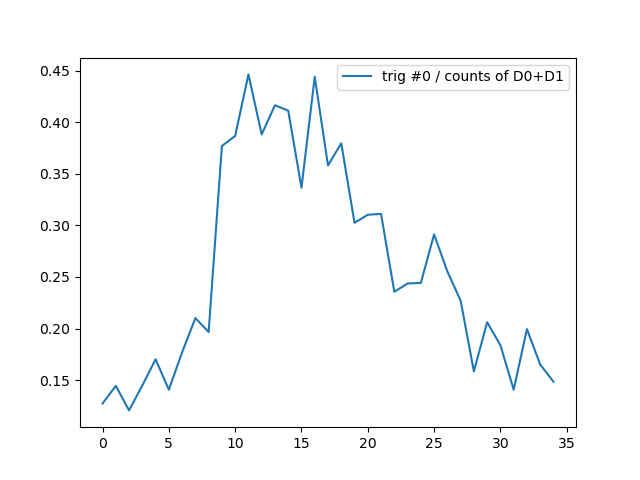

<IPython.core.display.Javascript object>


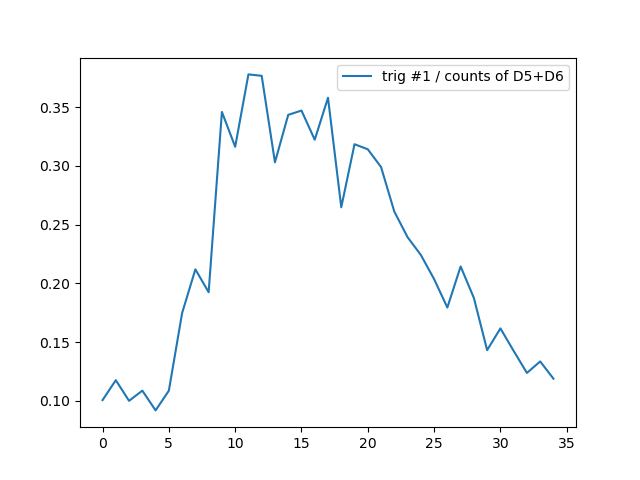

In [44]:
print(counts.shape)


DET_GROUPS = [
	[1, 2],
	[6, 7],
	[5, 11],
	[12, 13],
	[14, 15],
	[10, 16],
	[8, 9],
	[3, 4],
	[31, 32],
	[26, 27],
	[22, 28],
	[20, 21],
	[18, 19],
	[17, 23],
	[24, 25],
	[29, 30]
]
for i, dets in enumerate(DET_GROUPS):
    if i>=2:
        break
    #    continue
    d1,d2=dets[0]-1,dets[1]-1
    #trig=
    fig=plt.figure()
    #print(i, d1,d2)
    trig=trigger_rates[:,i]
    count_sum=np.sum(counts[:,d1,:,:]+ counts[:,d2,:,:], axis=(1,2))
    #plt.plot(trig, label=f'trig {i}')
    ratio=count_sum/trig
    #plt.plot(count_sum,label=f'counts of D{d1}+D{d2}')
    plt.plot(count_sum/trig,label=f'trig #{i} / counts of D{d1}+D{d2}')
    #most of the counts are not recorded at the begining due to the energy range 
    plt.legend()
    #break
    
    
    

    #print(i, '#', trig)
    #print(count_sum)
    #print(l1data['timedel'])


#sci_data.spectrogram[1:, :]

In [3]:
x=np.arange(6)
y=x+2

In [13]:
np.column_stack((x,y))

array([[0, 2],
       [1, 3],
       [2, 4],
       [3, 5],
       [4, 6],
       [5, 7]])